## Reproducing Original Demo
We followed the original demo in the Mazzoni paper and we should see similar output to the original demo. However, The original demo does not have current, so we need to generate that on our own. 
This is how we followed the orogimal code:



## Read data in vectors


In [ ]:
from logging import raiseExceptions
from scipy.interpolate import interp1d
from numpy.linalg import norm
import pickle
import importlib.resources as pkg_resources
from numpy import array
import numpy as np
from wslfp import lfp_amplitude_function

class WSLFP:
    def __init__(self, xs, ys, zs, elec_coords, alpha=1.65, tau_ampa_ms=6, tau_gaba_ms=0):
        """xs, ys, zs are n_neurons-length 1D arrays
        elec_coords is a (n_elec, 3) array
        [[1, 1, 1],
         [2, 2, 2]] """
        self.a = self._amplitude(xs, ys, zs, elec_coords)
        self.alpha = alpha
        self.tau_ampa_ms = tau_ampa_ms
        self.tau_gaba_ms = tau_gaba_ms
# add more

## Calculate LFP amplitude

([<matplotlib.axis.XTick at 0x7ff93ba9ae10>,
 [Text(0, 0, '0.0'),
  Text(1, 0, '125.0'),
  Text(2, 0, '250.0'),
  Text(3, 0, '375.0'),
  Text(4, 0, '500.0'),
  Text(5, 0, '625.0'),
  Text(6, 0, '750.0'),
  Text(7, 0, '875.0'),
  Text(8, 0, '1000.0')])

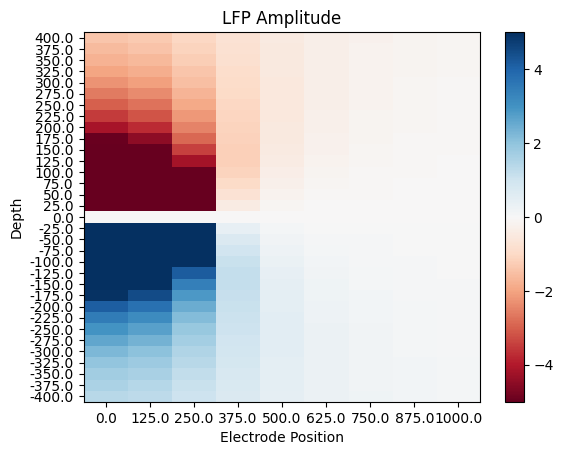

In [1]:
import numpy as np
import matplotlib.pyplot as plt
"z: depth from the electrode to the midpoint of the neuron in micrometers"
z = np.linspace(400, -400, 33)
"pop_radius: radius of the population of neurons in micrometers"
pop_radius = 250
"x: electrode positions spaced 125 micrometers apart"
x = np.linspace(0, 4, 9) * pop_radius
"x_neurons: represents 4000 random neurons at various positions in the population"
x_neurons = np.random.uniform(-250, 250, (4000))
"z_neurons: represents neurons at various depths in the population"
z_neurons = 0

"calculate: takes in x and z and uses the equation proposed in Mazzoni et al. (2015) to produce LFP"
def calculate(x, z):
    r = np.sqrt(x**2 + z**2)
    L = 250
    sigma = 0.3
    costheta = -z / r
    return (L * costheta) / (4 * np.pi * sigma * (r ** 2))

XX, ZZ = np.meshgrid(x, z)
XX = XX[..., np.newaxis] - x_neurons
ZZ = ZZ[..., np.newaxis] - z_neurons
f = calculate(XX, ZZ).sum(axis = 2)

plt.figure()
plt.imshow(f, cmap = 'RdBu', aspect='auto')
plt.clim(-5,5)
plt.colorbar()
plt.title('LFP Amplitude')
plt.ylabel('Depth')
plt.xlabel('Electrode Position')
plt.yticks(range(33), labels=z)
plt.xticks(range(9), labels=x)